<a href="https://colab.research.google.com/github/Yeen000/Aiffel/blob/master/abtest_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

df = pd.read_csv('/content/drive/MyDrive/AD/combined_campaign_data.csv') #각자경로

In [ ]:
df.head()

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
0,Control Campaign,1.08.2019,2280,82702.0,56930.0,7016.0,2290.0,2159.0,1819.0,618.0
1,Control Campaign,2.08.2019,1757,121040.0,102513.0,8110.0,2033.0,1841.0,1219.0,511.0
2,Control Campaign,3.08.2019,2343,131711.0,110862.0,6508.0,1737.0,1549.0,1134.0,372.0
3,Control Campaign,4.08.2019,1940,72878.0,61235.0,3065.0,1042.0,982.0,1183.0,340.0
4,Control Campaign,5.08.2019,1835,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# 예: 'Campaign Name' 열에서 앞의 'Control' 또는 'Test' 추출
df['Group'] = df['Campaign Name'].str.extract(r'^(Control|Test)', expand=False)
df.head()

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase,Group
0,Control Campaign,1.08.2019,2280,82702.0,56930.0,7016.0,2290.0,2159.0,1819.0,618.0,Control
1,Control Campaign,2.08.2019,1757,121040.0,102513.0,8110.0,2033.0,1841.0,1219.0,511.0,Control
2,Control Campaign,3.08.2019,2343,131711.0,110862.0,6508.0,1737.0,1549.0,1134.0,372.0,Control
3,Control Campaign,4.08.2019,1940,72878.0,61235.0,3065.0,1042.0,982.0,1183.0,340.0,Control
4,Control Campaign,5.08.2019,1835,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Control


In [ ]:
# 날짜 형식 변환
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

# 날짜 순 정렬 (보간 전에 필수!)
df = df.sort_values(by='Date')

# 수치형 컬럼만 보간 (선형 방식)
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numeric_cols] = df[numeric_cols].interpolate(method='linear')

In [ ]:
df[df['Group'] == 'Control']

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase,Group
0,Control Campaign,2019-08-01,2280,82702.0,56930.0,7016.0,2290.0,2159.0,1819.0,618.0,Control
1,Control Campaign,2019-08-02,1757,121040.0,102513.0,8110.0,2033.0,1841.0,1219.0,511.0,Control
2,Control Campaign,2019-08-03,2343,131711.0,110862.0,6508.0,1737.0,1549.0,1134.0,372.0,Control
3,Control Campaign,2019-08-04,1940,72878.0,61235.0,3065.0,1042.0,982.0,1183.0,340.0,Control
4,Control Campaign,2019-08-05,1835,96373.0,60537.5,5039.5,2161.0,1147.5,761.0,554.0,Control
5,Control Campaign,2019-08-06,3083,109076.0,87998.0,4028.0,1709.0,1249.0,784.0,764.0,Control
6,Control Campaign,2019-08-07,2544,142123.0,127852.0,2640.0,1388.0,1106.0,1166.0,499.0,Control
7,Control Campaign,2019-08-08,1900,90939.0,65217.0,7260.0,3047.0,2746.0,930.0,462.0,Control
8,Control Campaign,2019-08-09,2813,121332.0,94896.0,6198.0,2487.0,2179.0,645.0,501.0,Control
9,Control Campaign,2019-08-10,2149,117624.0,91257.0,2277.0,2475.0,1984.0,1629.0,734.0,Control


In [ ]:
df

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase,Group
0,Control Campaign,2019-08-01,2280,82702.0,56930.0,7016.0,2290.0,2159.0,1819.0,618.0,Control
30,Test Campaign,2019-08-01,3008,39550.0,35820.0,3038.0,1946.0,1069.0,894.0,255.0,Test
1,Control Campaign,2019-08-02,1757,121040.0,102513.0,8110.0,2033.0,1841.0,1219.0,511.0,Control
31,Test Campaign,2019-08-02,2542,100719.0,91236.0,4657.0,2359.0,1548.0,879.0,677.0,Test
2,Control Campaign,2019-08-03,2343,131711.0,110862.0,6508.0,1737.0,1549.0,1134.0,372.0,Control
32,Test Campaign,2019-08-03,2365,70263.0,45198.0,7885.0,2572.0,2367.0,1268.0,578.0,Test
3,Control Campaign,2019-08-04,1940,72878.0,61235.0,3065.0,1042.0,982.0,1183.0,340.0,Control
33,Test Campaign,2019-08-04,2710,78451.0,25937.0,4216.0,2216.0,1437.0,566.0,340.0,Test
4,Control Campaign,2019-08-05,1835,96373.0,60537.5,5039.5,2161.0,1147.5,761.0,554.0,Control
34,Test Campaign,2019-08-05,2297,114295.0,95138.0,5863.0,2106.0,858.0,956.0,768.0,Test


Revenue 지표 추가를 위해
임의의 지표 'AOV' = 50달러 설정

📊 그룹별 지표 요약:
Group       Control        Test  Uplift (%)
CTR          0.0510      0.1024    100.8163
CVR          0.1146      0.0923    -19.4562
CPM         21.6265     42.6810     97.3549
CPC          0.4905      0.4687     -4.4502
CPA          4.9943      5.8996     18.1256
Revenue  26191.6667  20849.3333    -20.3971
ROAS        11.7185      8.2631    -29.4869


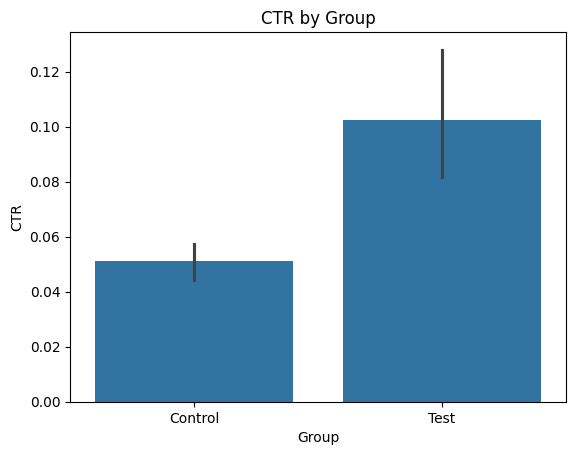

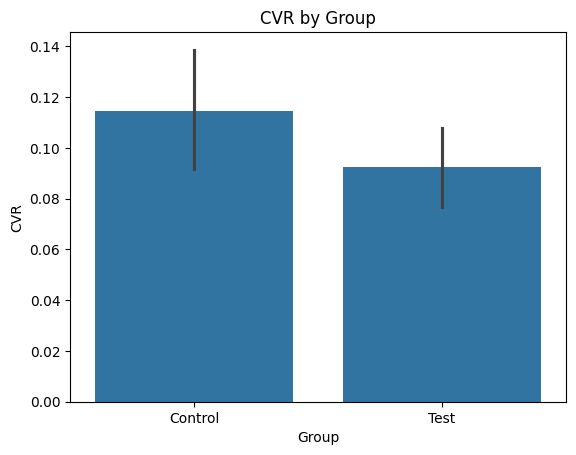

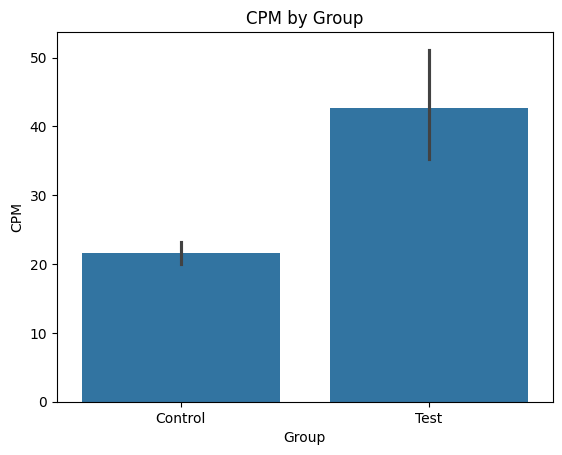

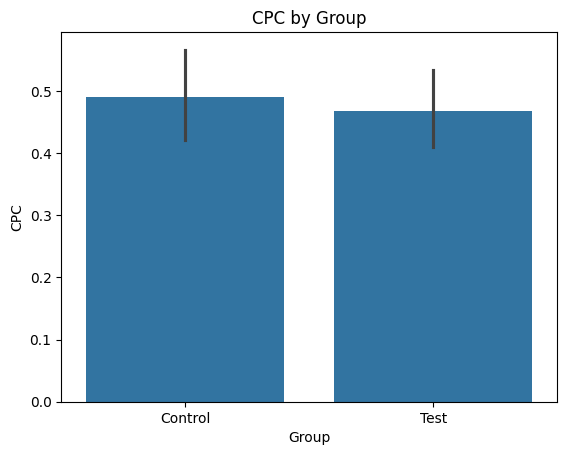

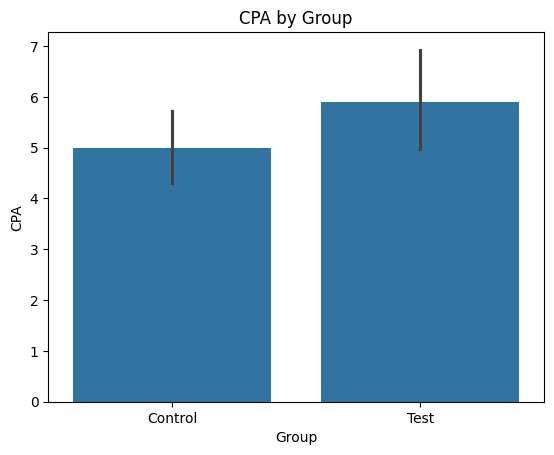

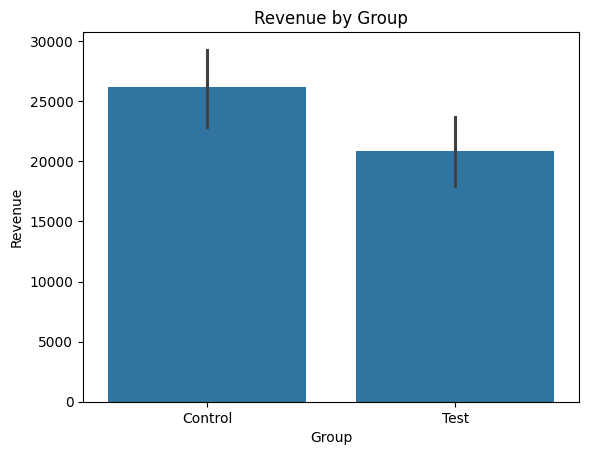

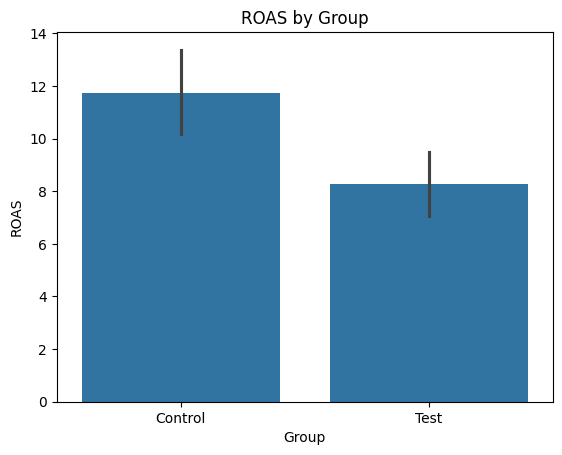


📈 통계적 유의성 검정 결과:
CTR: t-stat=3.987, p-value=0.0003
CVR: t-stat=-1.515, p-value=0.1359
CPM: t-stat=4.763, p-value=0.0000
CPC: t-stat=-0.424, p-value=0.6734
CPA: t-stat=1.415, p-value=0.1627
Revenue: t-stat=-2.358, p-value=0.0218
ROAS: t-stat=-3.300, p-value=0.0017


In [ ]:


# 6. 지표 계산
df['CTR'] = df['# of Website Clicks'] / df['# of Impressions']
df['CVR'] = df['# of Purchase'] / df['# of Website Clicks']
df['CPM'] = (df['Spend [USD]'] / df['# of Impressions']) * 1000
df['CPC'] = df['Spend [USD]'] / df['# of Website Clicks']
df['CPA'] = df['Spend [USD]'] / df['# of Purchase']

# # 6번 지표 계산 부분에 추가
# AOV =50
# df['Revenue'] = df['# of Purchase'] * AOV
# df['ROAS'] = df['Revenue'] / df['Spend [USD]']

# ✅ Group별 AOV 설정
df['AOV'] = df['Group'].map({'Control': 50, 'Test': 40})
df['Revenue'] = df['# of Purchase'] * df['AOV']
df['ROAS'] = df['Revenue'] / df['Spend [USD]']

# 7. 그룹별 평균 비교
metrics = ['CTR', 'CVR', 'CPM', 'CPC', 'CPA', 'Revenue', 'ROAS']
summary = df.groupby('Group')[metrics].mean().T
summary['Uplift (%)'] = (summary['Test'] - summary['Control']) / summary['Control'] * 100

# 8. 출력
print("📊 그룹별 지표 요약:")
print(summary.round(4))

# 9. 시각화
for metric in metrics:
    sns.barplot(data=df, x='Group', y=metric)
    plt.title(f'{metric} by Group')
    plt.ylabel(metric)
    plt.xlabel('Group')
    plt.show()

# 10. 통계적 유의성 검정
print("\n📈 통계적 유의성 검정 결과:")
for metric in metrics:
    control_vals = df[df['Group'] == 'Control'][metric]
    test_vals = df[df['Group'] == 'Test'][metric]
    stat, p = ttest_ind(test_vals, control_vals, equal_var=False)
    print(f'{metric}: t-stat={stat:.3f}, p-value={p:.4f}')

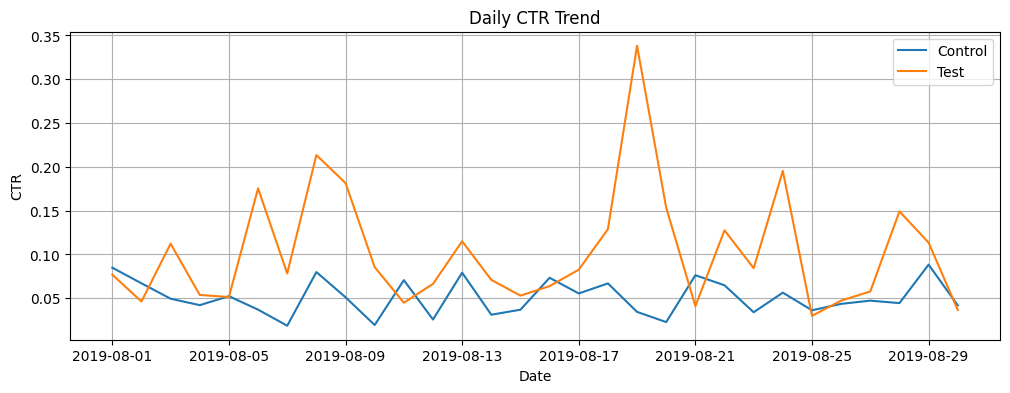

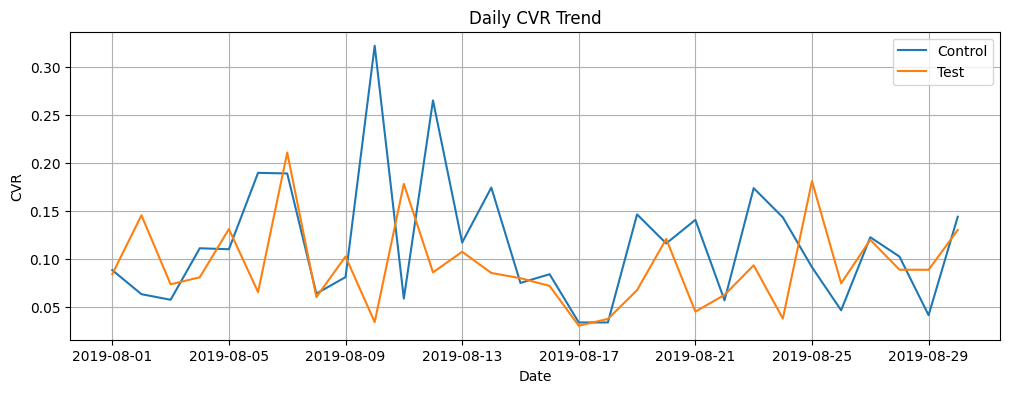

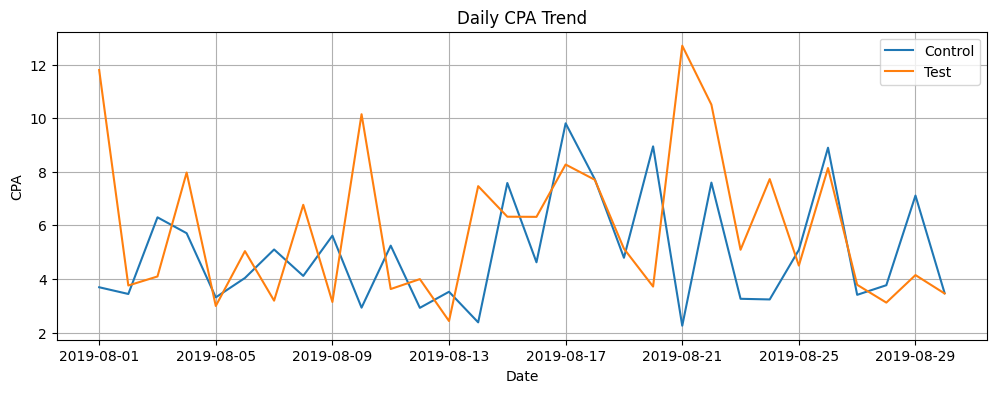

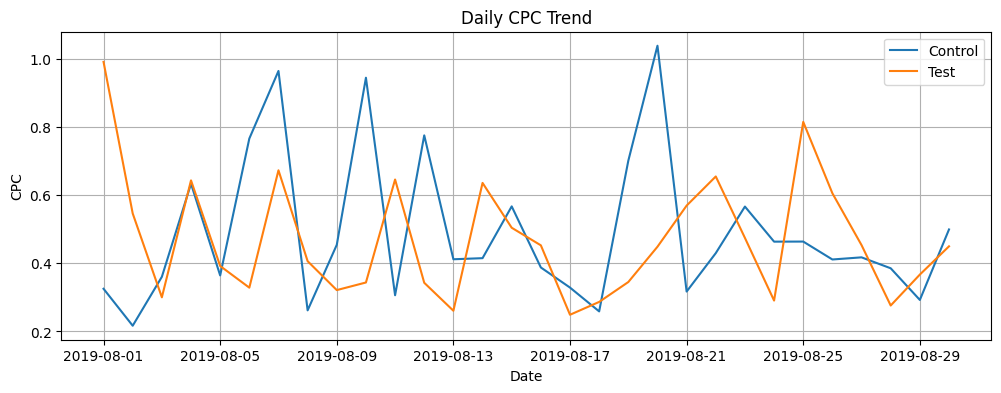

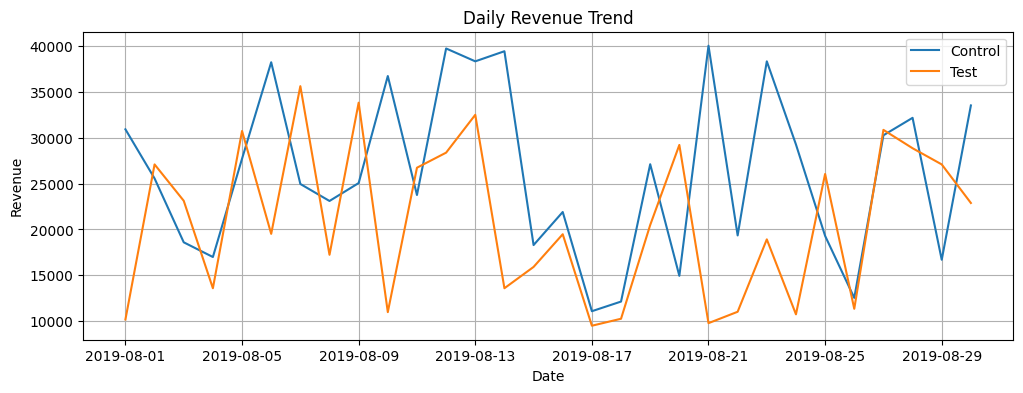

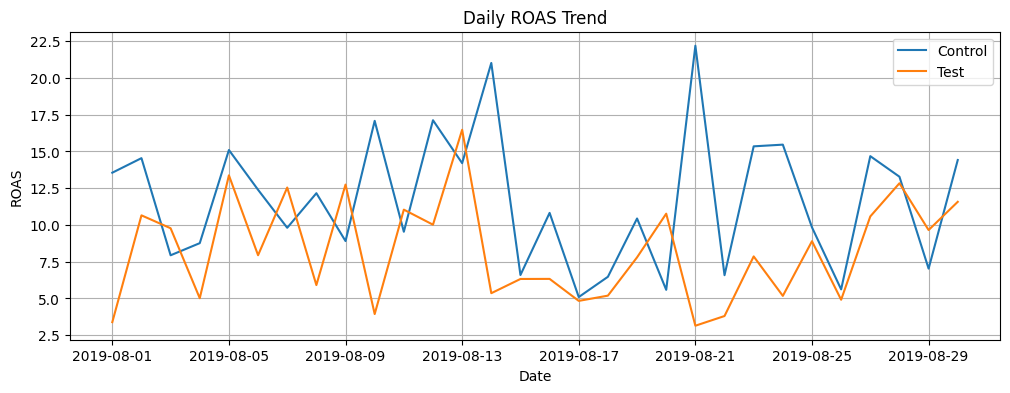

In [ ]:
import matplotlib.pyplot as plt

# 날짜 오름차순 정렬
df = df.sort_values(by='Date')

metrics = ['CTR', 'CVR', 'CPA', 'CPC','Revenue','ROAS']
for metric in metrics:
    plt.figure(figsize=(12, 4))
    for group in ['Control', 'Test']:
        subset = df[df['Group'] == group]
        plt.plot(subset['Date'], subset[metric], label=group)

    plt.title(f'Daily {metric} Trend')
    plt.xlabel('Date')
    plt.ylabel(metric)
    plt.legend()
    plt.grid(True)
    plt.show()

<Axes: title={'center': 'Daily CTR Difference (Test - Control)'}, xlabel='Date'>

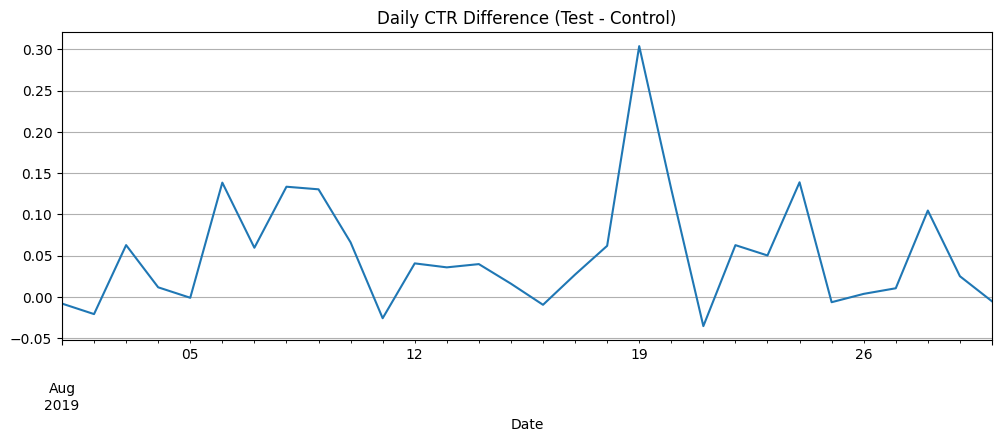

In [ ]:
# 피벗 테이블로 그룹별 날짜별 지표 정리
pivot_df = df.pivot(index='Date', columns='Group', values='CTR')  # 예시: CTR

# 차이 계산
pivot_df['Diff'] = pivot_df['Test'] - pivot_df['Control']

# 시각화
pivot_df['Diff'].plot(figsize=(12, 4), title='Daily CTR Difference (Test - Control)', grid=True)

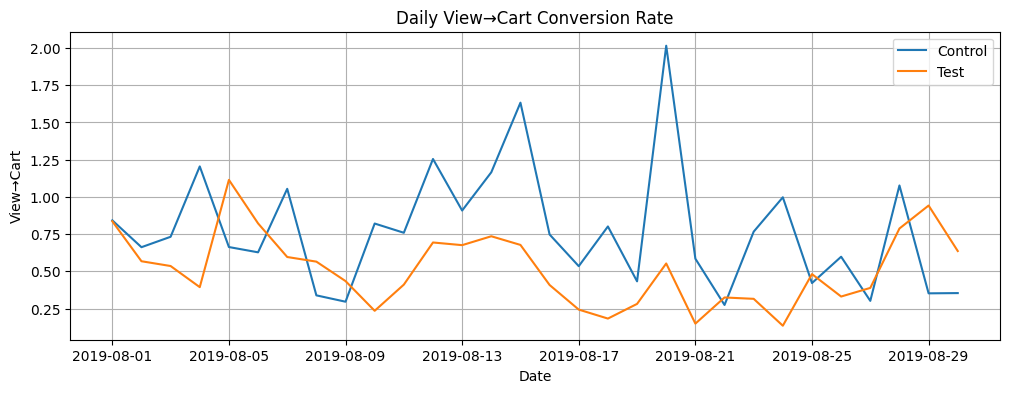

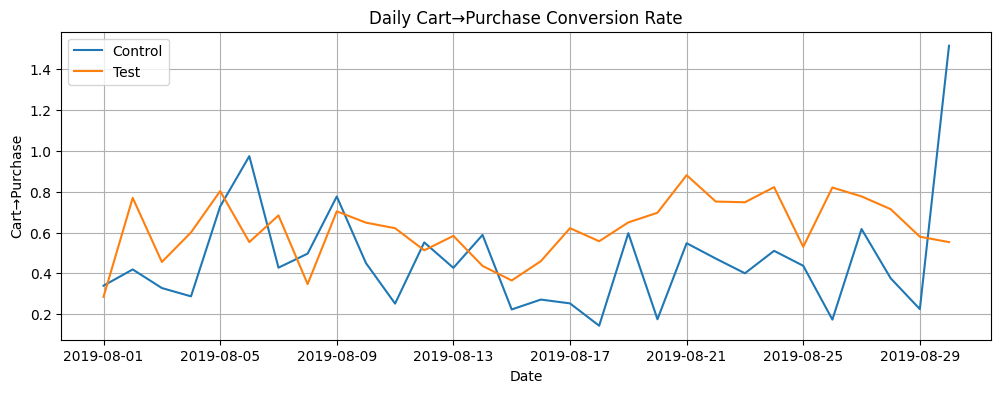

In [ ]:
df['View→Cart'] = df['# of Add to Cart'] / df['# of View Content']
df['Cart→Purchase'] = df['# of Purchase'] / df['# of Add to Cart']

for metric in ['View→Cart', 'Cart→Purchase']:
    plt.figure(figsize=(12, 4))
    for group in ['Control', 'Test']:
        subset = df[df['Group'] == group]
        plt.plot(subset['Date'], subset[metric], label=group)

    plt.title(f'Daily {metric} Conversion Rate')
    plt.xlabel('Date')
    plt.ylabel(metric)
    plt.legend()
    plt.grid(True)
    plt.show()

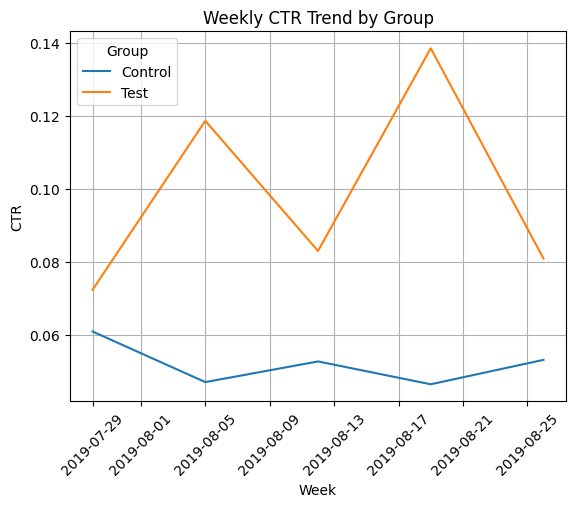

In [ ]:
df['Week'] = df['Date'].dt.to_period('W').apply(lambda r: r.start_time)

weekly_avg = df.groupby(['Week', 'Group'])[['CTR', 'CVR', 'CPA']].mean().reset_index()

# 예: 주간 CTR 그래프
sns.lineplot(data=weekly_avg, x='Week', y='CTR', hue='Group')
plt.title('Weekly CTR Trend by Group')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


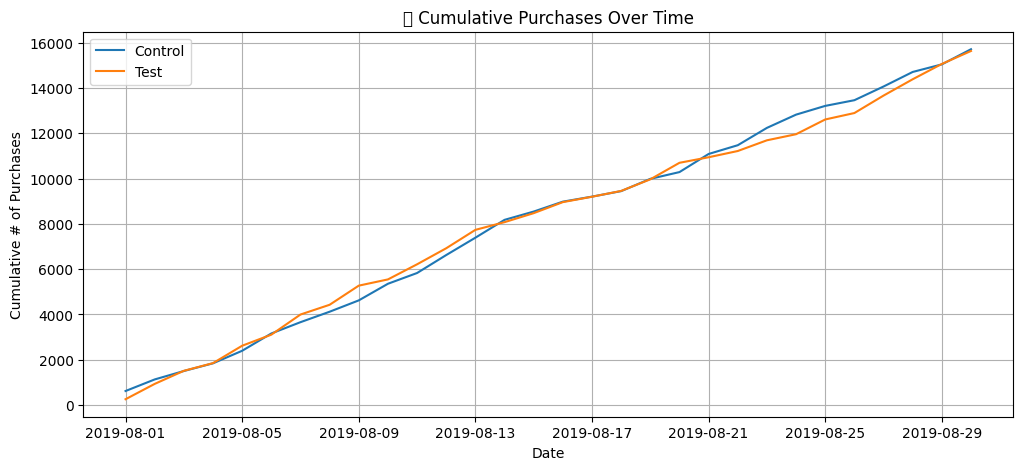

In [ ]:
import matplotlib.pyplot as plt

# 날짜 오름차순 정렬
df = df.sort_values(by='Date')

# 누적 Purchase 계산
df['Cumulative Purchase'] = df.groupby('Group')['# of Purchase'].cumsum()

# 누적 그래프 그리기
plt.figure(figsize=(12, 5))
for group in ['Control', 'Test']:
    subset = df[df['Group'] == group]
    plt.plot(subset['Date'], subset['Cumulative Purchase'], label=group)

plt.title('📈 Cumulative Purchases Over Time')
plt.xlabel('Date')
plt.ylabel('Cumulative # of Purchases')
plt.legend()
plt.grid(True)
plt.show()

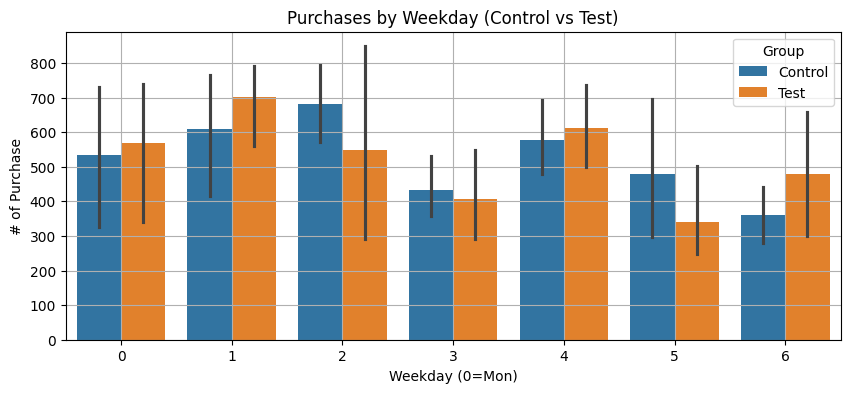

In [ ]:
# 요일 추가 (0=Monday, 6=Sunday)
df['Weekday'] = df['Date'].dt.weekday

# 요일별 평균 구매 비교
import seaborn as sns

plt.figure(figsize=(10, 4))
sns.barplot(data=df, x='Weekday', y='# of Purchase', hue='Group')
plt.title('Purchases by Weekday (Control vs Test)')
plt.xlabel('Weekday (0=Mon)')
plt.ylabel('# of Purchase')
plt.grid(True)
plt.show()

📌 만약 날씨나 이벤트 요인을 연동하고 싶다면,
	•	weather.csv 같은 외부 데이터를 날짜별로 병합 (예: merge(on='Date'))
	•	혹은 특정 이벤트 날짜에 dummy 변수 추가 (예: df['holiday'] = df['Date'].isin(event_days))

In [ ]:
# 퍼널 전환률 계산
df['View→Cart'] = df['# of Add to Cart'] / df['# of View Content']
df['Cart→Purchase'] = df['# of Purchase'] / df['# of Add to Cart']
df['View→Purchase'] = df['# of Purchase'] / df['# of View Content']

# 그룹별 평균 퍼널 전환률 요약
funnel_summary = df.groupby('Group')[['View→Cart', 'Cart→Purchase', 'View→Purchase']].mean().round(4)

print("📊 전환 퍼널 요약 테이블:")
print(funnel_summary)

📊 전환 퍼널 요약 테이블:
         View→Cart  Cart→Purchase  View→Purchase
Group                                           
Control     0.7740         0.4662         0.3203
Test        0.5151         0.6179         0.3055


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128197 (\N{CALENDAR}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


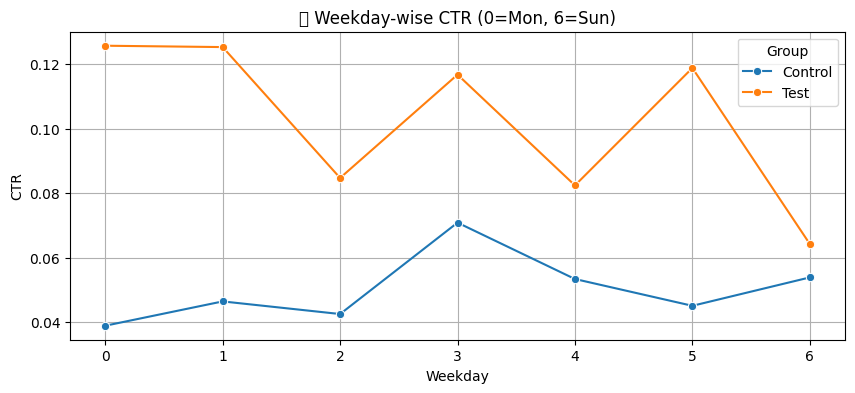

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128197 (\N{CALENDAR}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


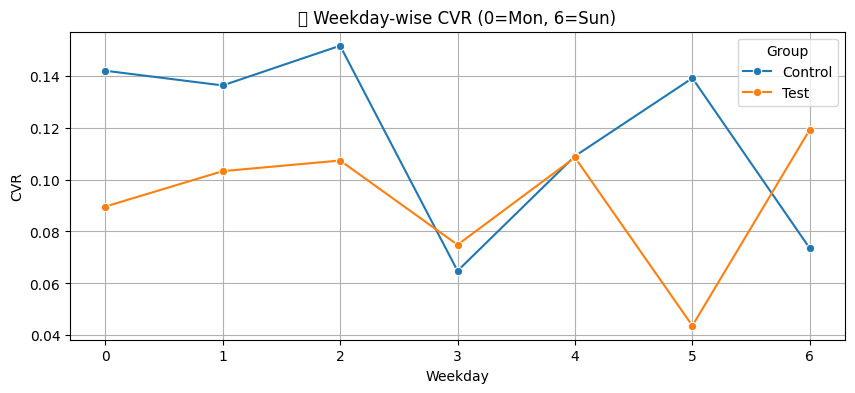

In [ ]:
# 요일 추가 (0=월요일 ~ 6=일요일)
df['Weekday'] = df['Date'].dt.weekday

# 요일별 평균 CTR / CVR
weekday_summary = df.groupby(['Weekday', 'Group'])[['CTR', 'CVR']].mean().reset_index()

# 시각화
import seaborn as sns
import matplotlib.pyplot as plt

for metric in ['CTR', 'CVR']:
    plt.figure(figsize=(10, 4))
    sns.lineplot(data=weekday_summary, x='Weekday', y=metric, hue='Group', marker='o')
    plt.title(f'📅 Weekday-wise {metric} (0=Mon, 6=Sun)')
    plt.grid(True)
    plt.show()

In [ ]:
# 클릭 수 기준 세그먼트 나누기 (중앙값 기준)
click_median = df['# of Website Clicks'].median()
df['Click_Segment'] = df['# of Website Clicks'].apply(lambda x: 'Low' if x < click_median else 'High')

# 세그먼트별 평균 CTR / CVR
segment_summary = df.groupby(['Click_Segment', 'Group'])[['CTR', 'CVR']].mean().round(4)

print("📊 클릭 수 기준 CTR / CVR:")
print(segment_summary)

📊 클릭 수 기준 CTR / CVR:
                          CTR     CVR
Click_Segment Group                  
High          Control  0.0675  0.0720
              Test     0.1343  0.0776
Low           Control  0.0384  0.1472
              Test     0.0608  0.1115


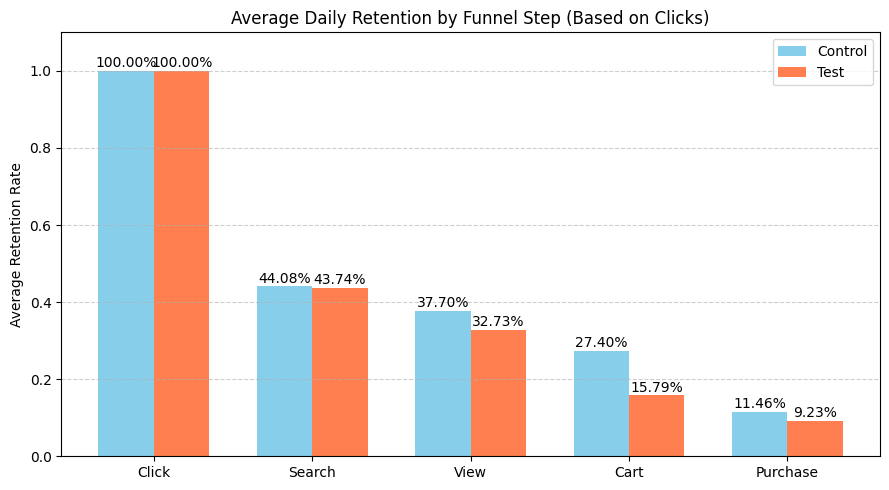

In [ ]:
import matplotlib.pyplot as plt

# Function to compute average daily retention rates based on clicks
def compute_avg_daily_retention(df_subset):
    daily = df_subset.groupby('Date', as_index=False).agg({
        '# of Website Clicks': 'sum',
        '# of Searches': 'sum',
        '# of View Content': 'sum',
        '# of Add to Cart': 'sum',
        '# of Purchase': 'sum'
    })

    # Calculate retention at each step as a ratio over clicks
    daily['Search'] = daily['# of Searches'] / daily['# of Website Clicks']
    daily['View'] = daily['# of View Content'] / daily['# of Website Clicks']
    daily['Cart'] = daily['# of Add to Cart'] / daily['# of Website Clicks']
    daily['Purchase'] = daily['# of Purchase'] / daily['# of Website Clicks']
    daily['Click'] = 1.0  # baseline

    # Return average retention rates (Click, Search, View, Cart, Purchase)
    return daily[['Click', 'Search', 'View', 'Cart', 'Purchase']].mean().tolist()

# Split by group
df_control = df[df['Group'] == 'Control']
df_test = df[df['Group'] == 'Test']

# Compute retention rates
retain_control_avg = compute_avg_daily_retention(df_control)
retain_test_avg = compute_avg_daily_retention(df_test)

# Plotting
labels = ['Click', 'Search', 'View', 'Cart', 'Purchase']
x = range(len(labels))
bar_width = 0.35

plt.figure(figsize=(9, 5))
bars1 = plt.bar([i - bar_width/2 for i in x], retain_control_avg, width=bar_width, label='Control', color='skyblue')
bars2 = plt.bar([i + bar_width/2 for i in x], retain_test_avg, width=bar_width, label='Test', color='coral')

# Add value labels to bars (in percentage)
for i in x:
    plt.text(i - bar_width/2, retain_control_avg[i] + 0.01, f"{retain_control_avg[i] * 100:.2f}%", ha='center')
    plt.text(i + bar_width/2, retain_test_avg[i] + 0.01, f"{retain_test_avg[i] * 100:.2f}%", ha='center')

plt.xticks(x, labels)
plt.title("Average Daily Retention by Funnel Step (Based on Clicks)")
plt.ylabel("Average Retention Rate")
plt.ylim(0, 1.1)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

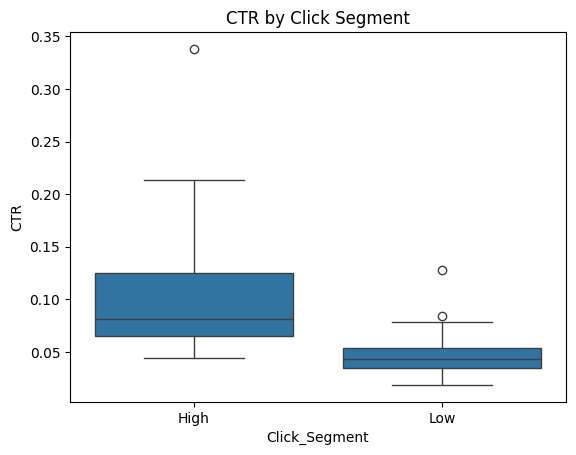

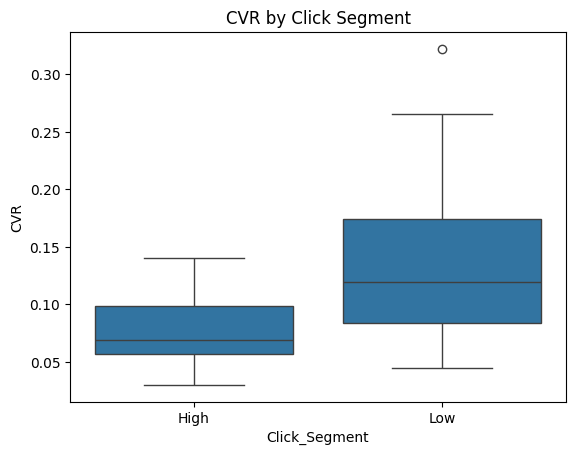

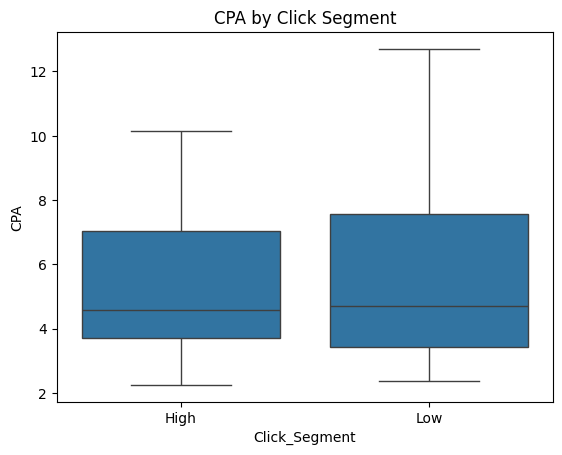

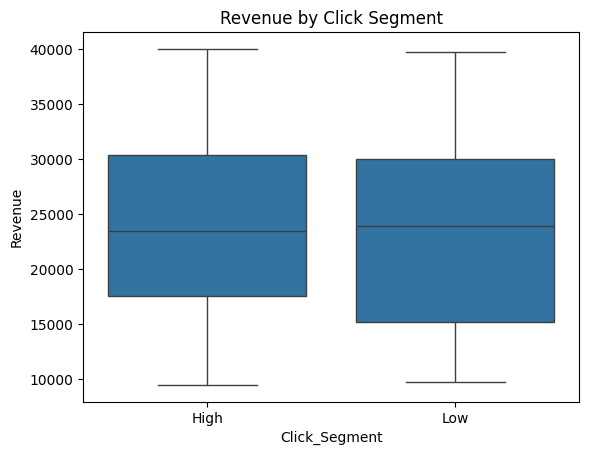

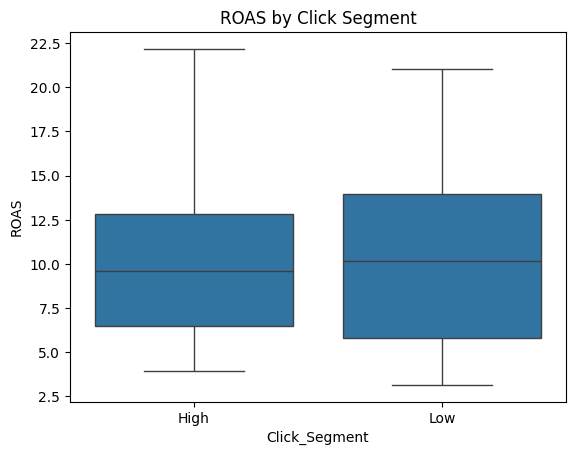

{'CPA': {'High 평균': 5.288413675841833,
         'Low 평균': 5.605512248002175,
         'Uplift (%)': -5.656906240341495,
         'p-value': 0.6272,
         '유의성': '❌ 유의미하지 않음'},
 'CTR': {'High 평균': 0.10535182378389514,
         'Low 평균': 0.048073911913647446,
         'Uplift (%)': 119.14551903563182,
         'p-value': 0.0001,
         '유의성': '✅ 유의미'},
 'CVR': {'High 평균': 0.07517934227536462,
         'Low 평균': 0.13174315731042657,
         'Uplift (%)': -42.93491684109298,
         'p-value': 0.0001,
         '유의성': '✅ 유의미'},
 'ROAS': {'High 평균': 9.828262014605267,
          'Low 평균': 10.15337423391775,
          'Uplift (%)': -3.202011585729139,
          'p-value': 0.7766,
          '유의성': '❌ 유의미하지 않음'},
 'Revenue': {'High 평균': 23314.0,
             'Low 평균': 23727.0,
             'Uplift (%)': -1.7406330340961773,
             'p-value': 0.8623,
             '유의성': '❌ 유의미하지 않음'}}


In [ ]:
# 클릭 세그먼트별 지표
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

# 🔍 1. 비교할 핵심 지표 선택
segment_metrics = ['CTR', 'CVR', 'CPA', 'Revenue', 'ROAS']

# 📊 2. 세그먼트별 평균 비교
segment_summary = df.groupby('Click_Segment')[segment_metrics].mean().T

# 🧮 3. 유의성 검정 (High vs Low)
high = df[df['Click_Segment'] == 'High']
low = df[df['Click_Segment'] == 'Low']

ttest_results = {}
for metric in segment_metrics:
    t_stat, p_val = ttest_ind(high[metric], low[metric], equal_var=False)
    ttest_results[metric] = {
        'High 평균': high[metric].mean(),
        'Low 평균': low[metric].mean(),
        'Uplift (%)': ((high[metric].mean() - low[metric].mean()) / low[metric].mean()) * 100,
        'p-value': round(p_val, 4),
        '유의성': '✅ 유의미' if p_val < 0.05 else '❌ 유의미하지 않음'
    }

# 📈 4. 시각화 (선택적으로 실행)
for metric in segment_metrics:
    sns.boxplot(data=df, x='Click_Segment', y=metric)
    plt.title(f'{metric} by Click Segment')
    plt.show()

# 결과 보기
import pprint
pprint.pprint(ttest_results)

## MAB

In [ ]:
df

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase,...,AOV,Revenue,ROAS,View→Cart,Cart→Purchase,Week,Cumulative Purchase,Weekday,View→Purchase,Click_Segment
0,Control Campaign,2019-08-01,2280,82702.0,56930.0,7016.0,2290.0,2159.0,1819.0,618.0,...,50,30900.0,13.552632,0.842520,0.339747,2019-07-29,618.0,3,0.286244,High
30,Test Campaign,2019-08-01,3008,39550.0,35820.0,3038.0,1946.0,1069.0,894.0,255.0,...,40,10200.0,3.390957,0.836296,0.285235,2019-07-29,255.0,3,0.238541,Low
1,Control Campaign,2019-08-02,1757,121040.0,102513.0,8110.0,2033.0,1841.0,1219.0,511.0,...,50,25550.0,14.541833,0.662140,0.419196,2019-07-29,1129.0,4,0.277567,High
31,Test Campaign,2019-08-02,2542,100719.0,91236.0,4657.0,2359.0,1548.0,879.0,677.0,...,40,27080.0,10.653029,0.567829,0.770193,2019-07-29,932.0,4,0.437339,Low
2,Control Campaign,2019-08-03,2343,131711.0,110862.0,6508.0,1737.0,1549.0,1134.0,372.0,...,50,18600.0,7.938540,0.732085,0.328042,2019-07-29,1501.0,5,0.240155,High
32,Test Campaign,2019-08-03,2365,70263.0,45198.0,7885.0,2572.0,2367.0,1268.0,578.0,...,40,23120.0,9.775899,0.535699,0.455836,2019-07-29,1510.0,5,0.244191,High
3,Control Campaign,2019-08-04,1940,72878.0,61235.0,3065.0,1042.0,982.0,1183.0,340.0,...,50,17000.0,8.762887,1.204684,0.287405,2019-07-29,1841.0,6,0.346232,Low
33,Test Campaign,2019-08-04,2710,78451.0,25937.0,4216.0,2216.0,1437.0,566.0,340.0,...,40,13600.0,5.018450,0.393876,0.600707,2019-07-29,1850.0,6,0.236604,Low
4,Control Campaign,2019-08-05,1835,96373.0,60537.5,5039.5,2161.0,1147.5,761.0,554.0,...,50,27700.0,15.095368,0.663181,0.727989,2019-08-05,2395.0,0,0.482789,Low
34,Test Campaign,2019-08-05,2297,114295.0,95138.0,5863.0,2106.0,858.0,956.0,768.0,...,40,30720.0,13.373966,1.114219,0.803347,2019-08-05,2618.0,0,0.895105,High


In [ ]:
import pandas as pd
import numpy as np

# 그룹별 CTR, CVR 평균 계산
group_metrics = df.groupby('Group')[['CTR', 'CVR']].mean().to_dict()
ctr_dict = group_metrics['CTR']
cvr_dict = group_metrics['CVR']

print("📊 CTR 평균:", ctr_dict)
print("📊 CVR 평균:", cvr_dict)

📊 CTR 평균: {'Control': 0.051003139270281855, 'Test': 0.10242259642726075}
📊 CVR 평균: {'Control': 0.11461068255295519, 'Test': 0.092311817032836}


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


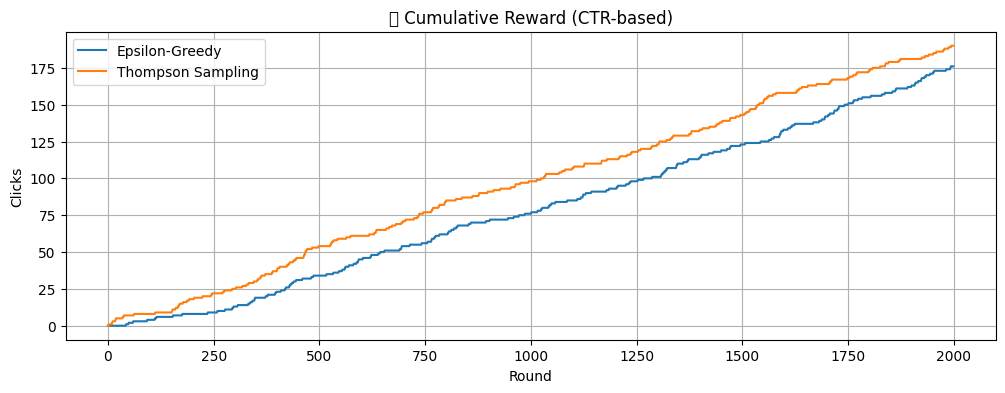

In [ ]:
import random
from scipy.stats import beta
import matplotlib.pyplot as plt

arms = ['Control', 'Test']
n_rounds = 2000
epsilon = 0.1

# 보상 확률 설정
true_ctr = ctr_dict

# 로그 초기화
eg_rewards = []
ts_rewards = []

# Epsilon-Greedy 초기화
eg_counts = {arm: 0 for arm in arms}
eg_values = {arm: 0 for arm in arms}

# Thompson Sampling 초기화
ts_successes = {arm: 1 for arm in arms}  # Beta(1,1) 초기 prior
ts_failures = {arm: 1 for arm in arms}

for t in range(n_rounds):

    # ---- Epsilon-Greedy ----
    if random.random() < epsilon:
        eg_arm = random.choice(arms)
    else:
        eg_arm = max(arms, key=lambda arm: eg_values[arm])

    reward = np.random.binomial(1, true_ctr[eg_arm])
    eg_counts[eg_arm] += 1
    eg_values[eg_arm] += (reward - eg_values[eg_arm]) / eg_counts[eg_arm]
    eg_rewards.append(reward)

    # ---- Thompson Sampling ----
    ts_samples = {arm: np.random.beta(ts_successes[arm], ts_failures[arm]) for arm in arms}
    ts_arm = max(ts_samples, key=ts_samples.get)

    reward = np.random.binomial(1, true_ctr[ts_arm])
    ts_successes[ts_arm] += reward
    ts_failures[ts_arm] += 1 - reward
    ts_rewards.append(reward)

# 누적 보상 시각화
plt.figure(figsize=(12, 4))
plt.plot(np.cumsum(eg_rewards), label='Epsilon-Greedy')
plt.plot(np.cumsum(ts_rewards), label='Thompson Sampling')
plt.title('🎯 Cumulative Reward (CTR-based)')
plt.xlabel('Round')
plt.ylabel('Clicks')
plt.legend()
plt.grid(True)
plt.show()

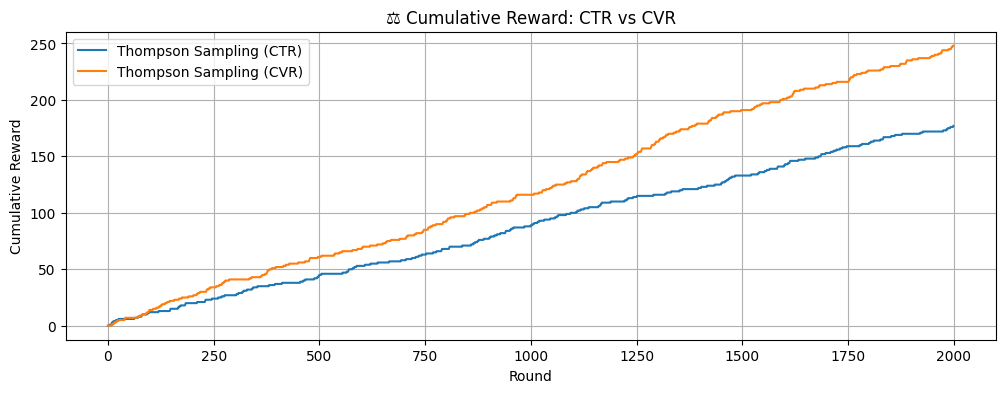

In [ ]:
# 다시 초기화
ts_rewards_ctr = []
ts_rewards_cvr = []

ts_s_ctr = {arm: 1 for arm in arms}
ts_f_ctr = {arm: 1 for arm in arms}
ts_s_cvr = {arm: 1 for arm in arms}
ts_f_cvr = {arm: 1 for arm in arms}

for t in range(n_rounds):

    # CTR 기준 TS
    samples_ctr = {arm: np.random.beta(ts_s_ctr[arm], ts_f_ctr[arm]) for arm in arms}
    arm_ctr = max(samples_ctr, key=samples_ctr.get)
    reward_ctr = np.random.binomial(1, ctr_dict[arm_ctr])
    ts_s_ctr[arm_ctr] += reward_ctr
    ts_f_ctr[arm_ctr] += 1 - reward_ctr
    ts_rewards_ctr.append(reward_ctr)

    # CVR 기준 TS
    samples_cvr = {arm: np.random.beta(ts_s_cvr[arm], ts_f_cvr[arm]) for arm in arms}
    arm_cvr = max(samples_cvr, key=samples_cvr.get)
    reward_cvr = np.random.binomial(1, cvr_dict[arm_cvr])
    ts_s_cvr[arm_cvr] += reward_cvr
    ts_f_cvr[arm_cvr] += 1 - reward_cvr
    ts_rewards_cvr.append(reward_cvr)

# 시각화
plt.figure(figsize=(12, 4))
plt.plot(np.cumsum(ts_rewards_ctr), label='Thompson Sampling (CTR)')
plt.plot(np.cumsum(ts_rewards_cvr), label='Thompson Sampling (CVR)')
plt.title('⚖️ Cumulative Reward: CTR vs CVR')
plt.xlabel('Round')
plt.ylabel('Cumulative Reward')
plt.legend()
plt.grid(True)
plt.show()

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129514 (\N{TEST TUBE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51456 (\N{HANGUL SYLLABLE JUN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


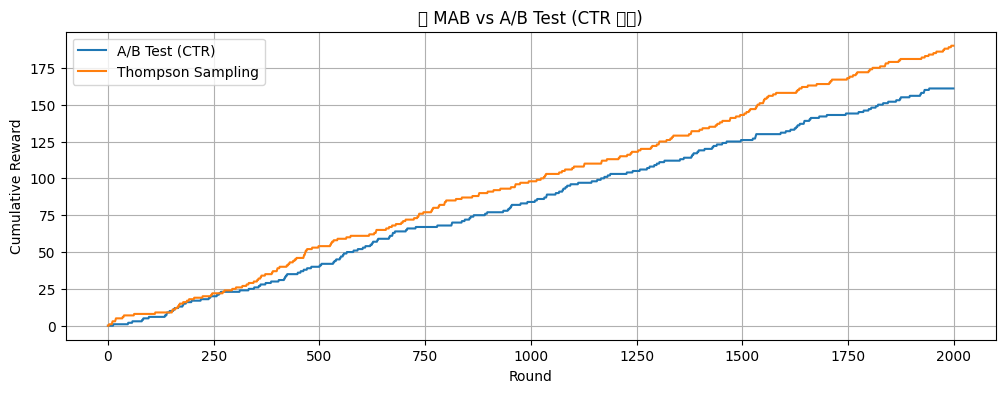

In [ ]:
# A/B 테스트: 유저를 반반 할당
ab_rewards = []
for t in range(n_rounds):
    arm = arms[t % 2]  # 50:50 고정
    reward = np.random.binomial(1, ctr_dict[arm])
    ab_rewards.append(reward)

# 비교 시각화
plt.figure(figsize=(12, 4))
plt.plot(np.cumsum(ab_rewards), label='A/B Test (CTR)')
plt.plot(np.cumsum(ts_rewards), label='Thompson Sampling')
plt.title('🧪 MAB vs A/B Test (CTR 기준)')
plt.xlabel('Round')
plt.ylabel('Cumulative Reward')
plt.legend()
plt.grid(True)
plt.show()

## 인과추론

In [ ]:
!pip install causalimpact

In [ ]:
from causalimpact import CausalImpact
import pandas as pd

# 1. 날짜별 캠페인별 CTR 피벗 테이블 생성
df_ctrs = df.pivot_table(index="Date", columns="Campaign Name", values="CTR")

# 2. CausalImpact용 데이터 구성
# 'Test'는 분석 대상(y), 'Control'은 통제 변수(x)
impact_data = df_ctrs[["Test Campaign", "Control Campaign"]].copy()
impact_data.columns = ['y', 'x1']  # y: test, x1: control

# 3. 분석 기간 설정
pre_period = [pd.to_datetime('2019-08-01'), pd.to_datetime('2019-08-16')]
post_period = [pd.to_datetime('2019-08-17'), pd.to_datetime('2019-08-29')]

# 4. 모델 실행
ci = CausalImpact(impact_data, pre_period, post_period)

# 5. 결과 출력
print(ci.summary())      # 텍스트 요약
print(ci.summary(output='report'))  # 상세 리포트
ci.plot()                # 시각화

AttributeError: 'NoneType' object has no attribute 'loc'

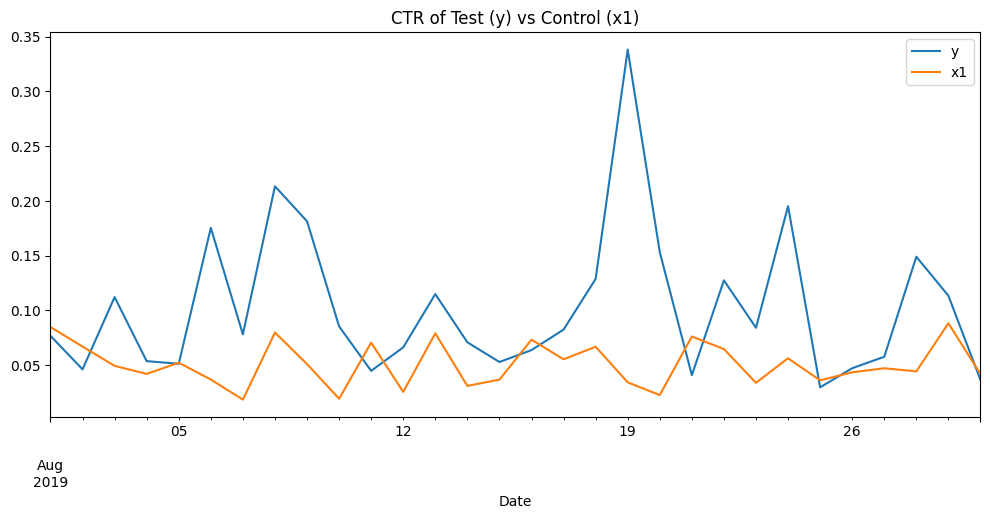

In [ ]:
import matplotlib.pyplot as plt
impact_data.plot(figsize=(12,5))
plt.title("CTR of Test (y) vs Control (x1)")
plt.show()

In [ ]:
correlation = impact_data.corr().iloc[0, 1]
print(f"상관계수: {correlation:.3f}")

상관계수: -0.010


In [ ]:
pip install scikit-learn==1.2.2 --force-reinstall

  Using cached scikit_learn-1.2.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (11 kB)
  Using cached numpy-2.2.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (62 kB)
  Using cached scipy-1.15.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
Using cached scikit_learn-1.2.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (9.6 MB)
Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
Using cached numpy-2.2.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (16.4 MB)
Using cached scipy-1.15.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (37.6 MB)
Using cached threadpoolctl-3.6.0-py3-none-any.whl (18 kB)
  Attempting uninstall: threadpoolctl
    Found existing installation: threadpoolctl 3.6.0
    Uninstalling threadpoolctl-3.6.0:
      Successfully unin

In [ ]:
!pip install econml

  Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.3 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.2.4
    Uninstalling numpy-2.2.4:
      Successfully uninstalled numpy-2.2.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
imbalanced-learn 0.13.0 requires scikit-learn<2,>=1.3.2, but you have scikit-learn 1.2.2 which is incompatible.
mlxtend 0.23.4 requires scikit-learn>=1.3.1, but you have scikit-learn 1.2.2 which is incompatible.


In [ ]:
from sklearn.linear_model import LassoCV
from econml.dml import LinearDML

# 1. 처리 변수: Test 여부
# df['T'] = (df['Campaign Name'] == 'Test Campaign').astype(int)
# df['T_event'] = ((df['Date'] >= '2019-08-18') & (df['Date'] <= '2019-08-22')).astype(int)
df['T_event_campaign'] = (
    (df['Campaign Name'] == 'Test Campaign') &
    (df['Date'] >= '2019-08-18') &
    (df['Date'] <= '2019-08-22')
).astype(int)

# 2. 결과 변수 (예: CTR)
Y = df["CTR"].values
# T = df["T"].values
T = df['T_event_campaign'].values

# 3. 공변량 (Confounders): 요일, 클릭세그먼트 등
X = pd.get_dummies(df[["Weekday", "Click_Segment"]], drop_first=True)

# 4. DML 모델 학습
model = LinearDML(model_y=LassoCV(), model_t=LassoCV(), random_state=0)
model.fit(Y, T, X=X)

# 5. 전체 평균 인과효과 (ATE) 계산
treatment_effects = model.effect(X)       # 개별 효과
ate = treatment_effects.mean()            # 평균 효과
print(f"Estimated ATE (CTR): {ate:.4f}")

Estimated ATE (CTR): 0.0578


In [ ]:
from sklearn.linear_model import LassoCV
from econml.dml import LinearDML
import matplotlib.pyplot as plt
import pandas as pd

# 처리 변수: 이벤트 기간 Test 캠페인에 노출된 경우
df['T_event'] = (
    (df['Campaign Name'] == 'Test Campaign') &
    (df['Date'] >= '2019-08-18') &
    (df['Date'] <= '2019-08-22')
).astype(int)

# 공변량
X = pd.get_dummies(df[["Weekday", "Click_Segment"]], drop_first=True)

# 분석할 결과 지표
metrics = {
    "CTR": df["CTR"].values,
    "CVR": (df["# of Purchase"] / df["# of Website Clicks"]).fillna(0).values,
    "Revenue": df["Revenue"].values
}

results = {}

# DML 모델 학습 및 ATE 추정
for metric, Y in metrics.items():
    model = LinearDML(model_y=LassoCV(), model_t=LassoCV(), random_state=0)
    model.fit(Y, df["T_event"].values, X=X)
    ate = model.effect(X).mean()
    results[metric] = ate


for k, v in results.items():
    print(f"{k}: {v:.4f}")

CTR: 0.0578
CVR: -0.0694
Revenue: -13905.4817
